In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from windrose import WindroseAxes

# **Import the dataset**

In [3]:
df = pd.read_csv("/Users/Sintayehu-PC/Desktop/DSA/solar-challenge-week1/src/data/togo-dapaong_qc.csv")
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


# **Summary Statics and Missing value Report**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [5]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [6]:
#converting time column to datetime data type
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [7]:
#Looking at the data date range
print("Time interval " ,df["Timestamp"].min()  , " to ", df["Timestamp"].max())

Time interval  2021-10-25 00:01:00  to  2022-10-25 00:00:00


Showing how many values missed from each column

In [8]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

We can see there is no missing in all the columns except for the comments

In [9]:
df.drop(columns=["Comments"] , inplace=True) #Let's drop the comments column which dont hold any useful information

Let's view the statical data for this dataset

In [10]:
df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,2022-04-25 12:00:30.000000768,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330
min,2021-10-25 00:01:00,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000
25%,2022-01-24 06:00:45,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000
50%,2022-04-25 12:00:30,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000
75%,2022-07-25 18:00:15,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000
max,2022-10-25 00:00:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277


We can see ths the many columns have outliner we can see how the max value is so far from 75th value

**Outliners**

In [11]:
Z_score_targets = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
#Calculating the Z-scores for the selected columns
Z_scores = df[Z_score_targets].apply(zscore)
#Z-scores greater than 3 or less than -3 are considered outliers
flaged_outliners = (abs(Z_scores) > 3).any(axis = 1)
print("Number of flaged outliers: ", flaged_outliners.sum())

Number of flaged outliers:  9251


**Imputation**

In [13]:
for col in Z_score_targets:
    df.loc[flaged_outliners , col]= df[col].median()
#imputing the outliers with the median of the column

Save the cleaned csv

In [14]:
df.to_csv("/Users/Sintayehu-PC/Desktop/DSA/solar-challenge-week1/src/data/togo.csv", index=False)

# **Time Series Analysis**

In [21]:
df_clean = pd.read_csv("/Users/Sintayehu-PC/Desktop/DSA/solar-challenge-week1/src/data/togo.csv").set_index("Timestamp")

In [22]:
columns_to_plot = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

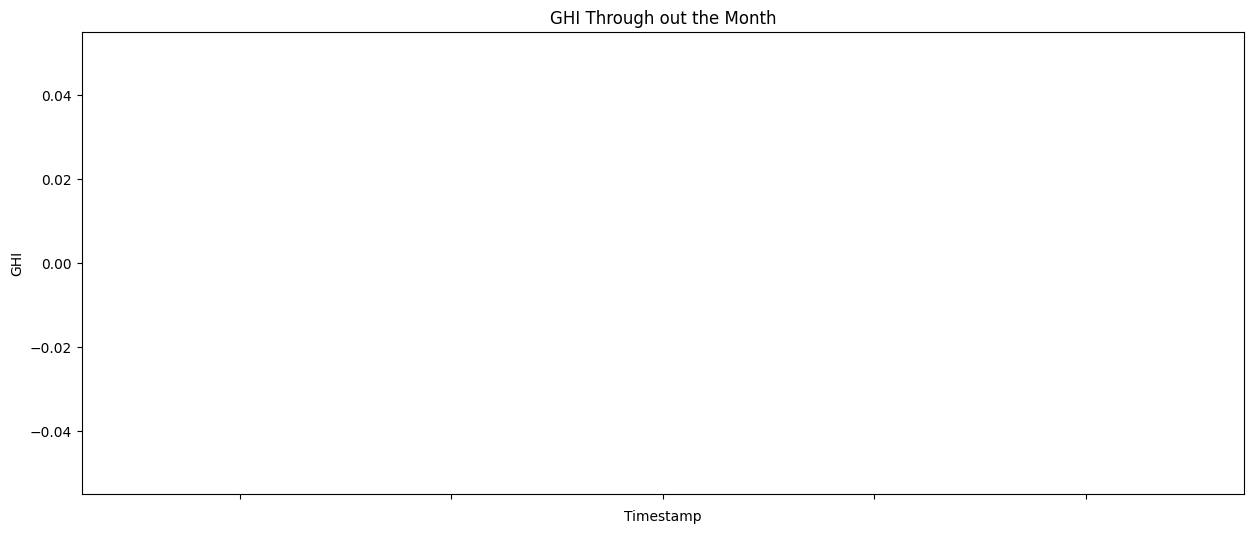

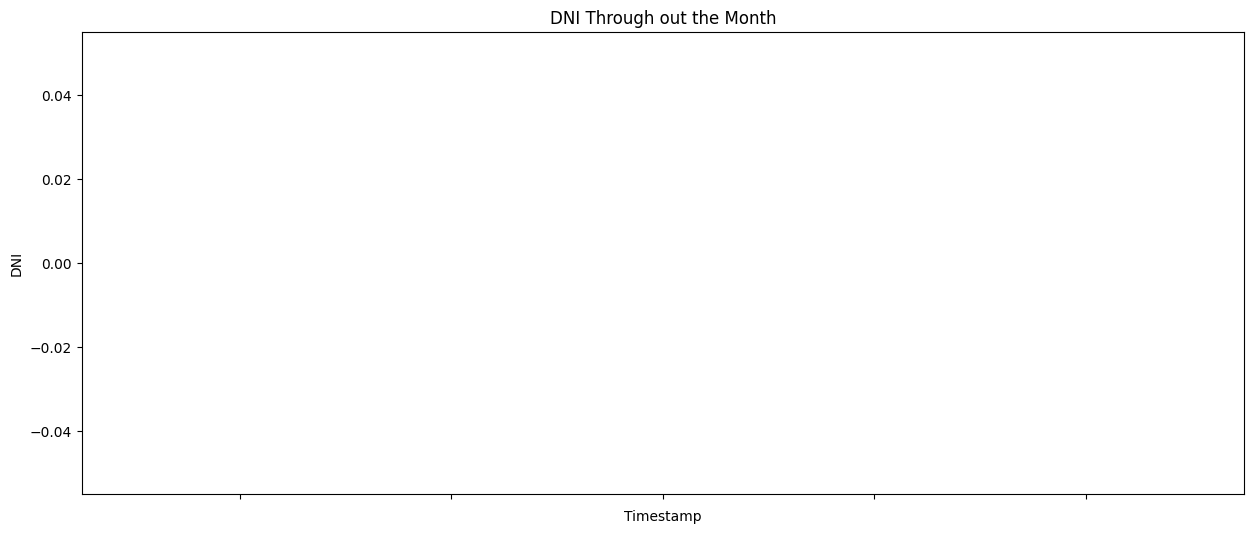

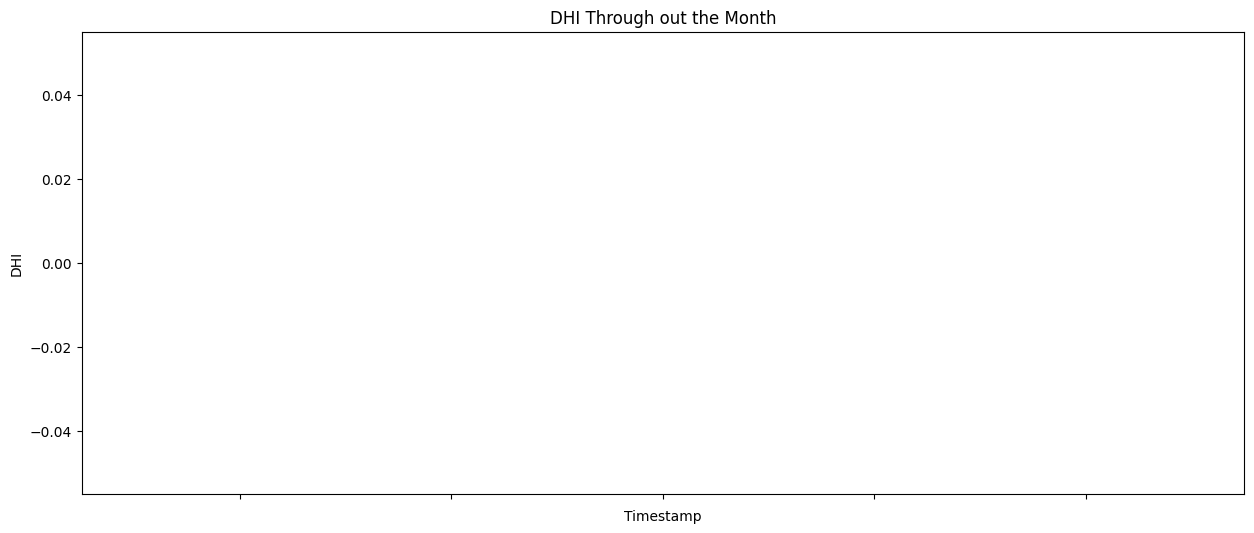

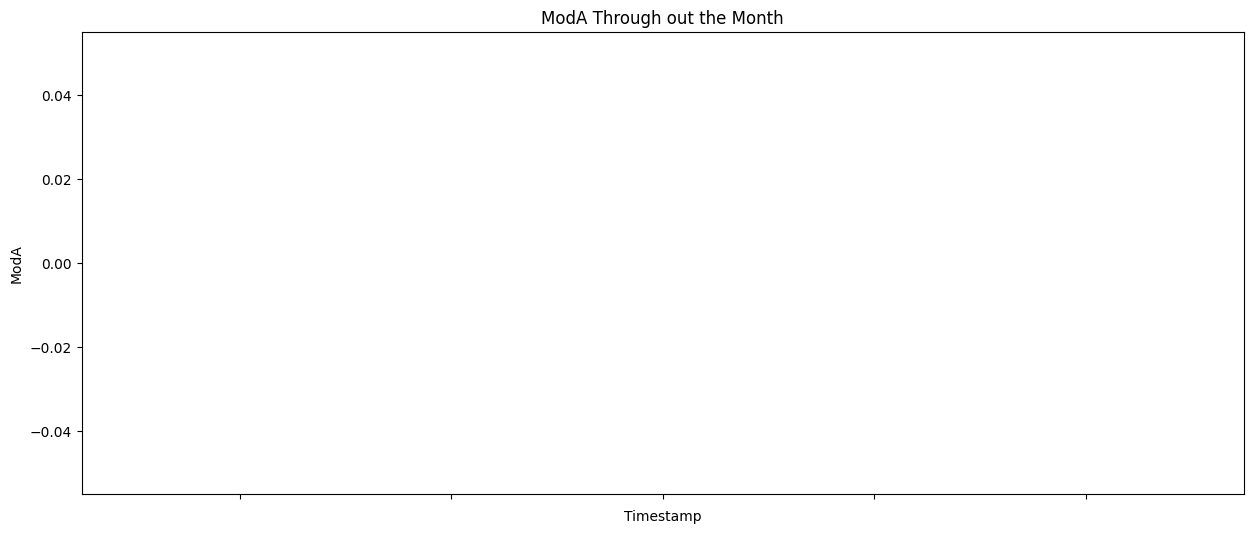

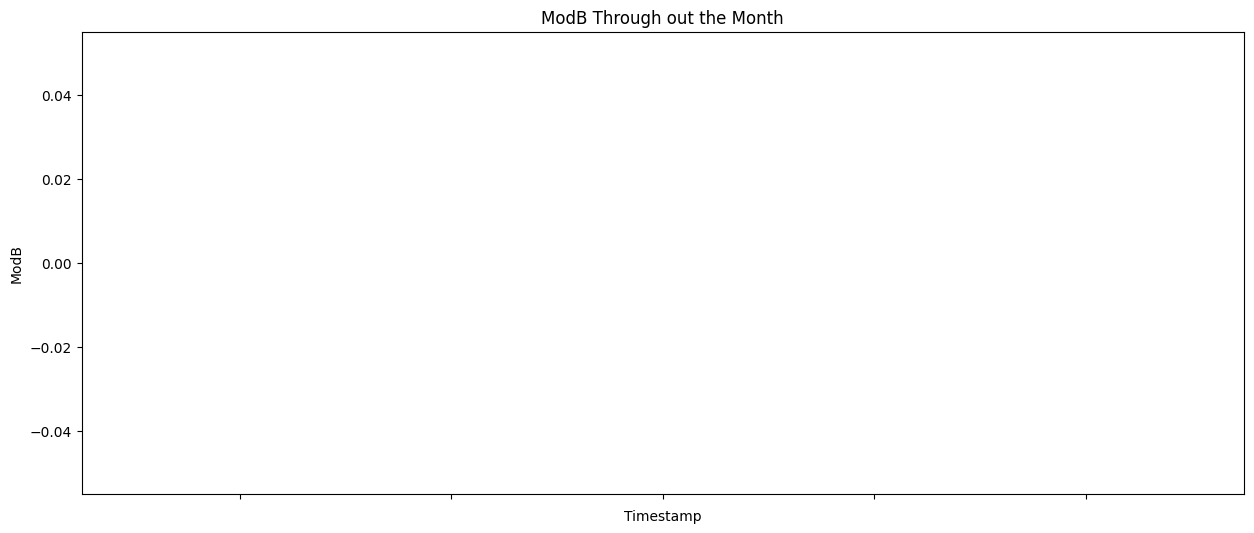

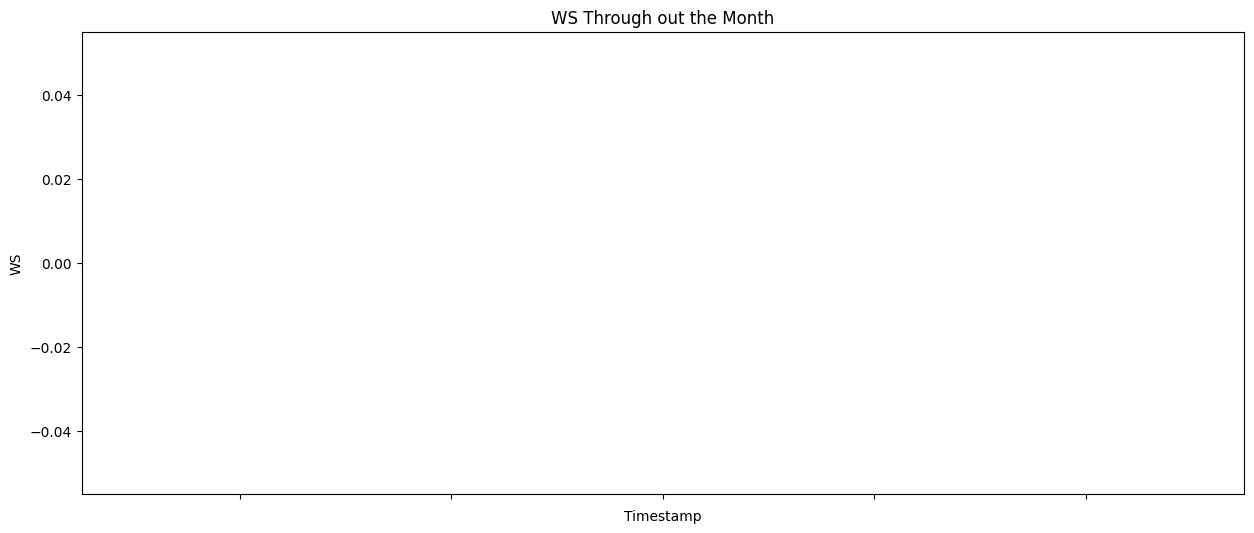

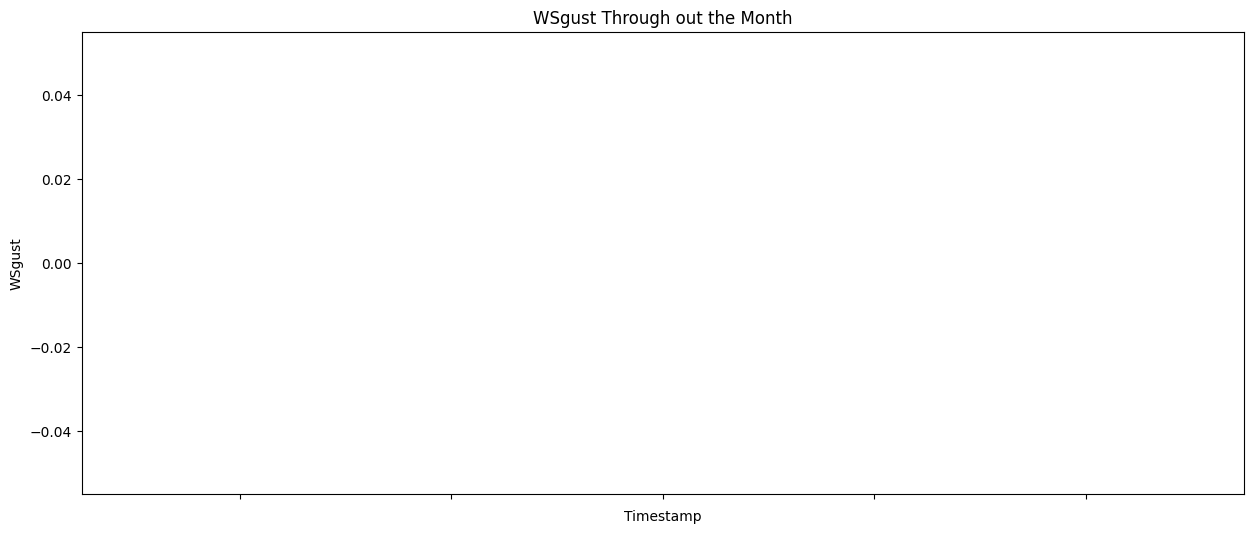

In [23]:

#ploting the one month period
for col in columns_to_plot:
    df_clean[col].loc['2021-08-09':'2021-09-9'].plot(kind="line", xlabel="Timestamp", ylabel=col, title= col + " Through out the Month" , figsize=(15, 6))
    plt.show()

We can see the pattern of these features over a month ... Let's see variation in a day which hours is peak

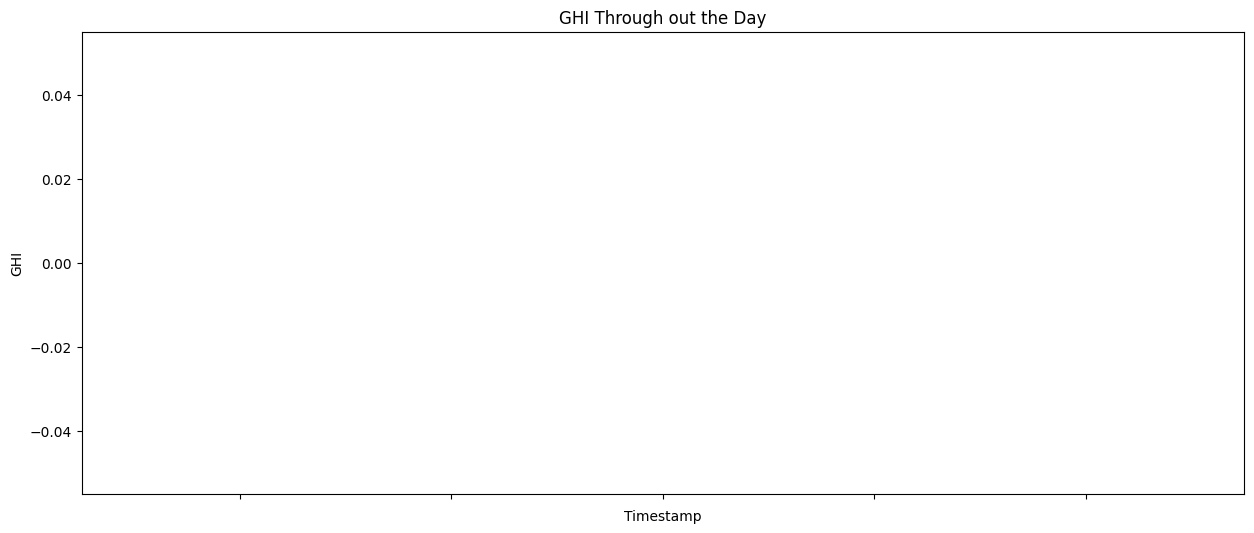

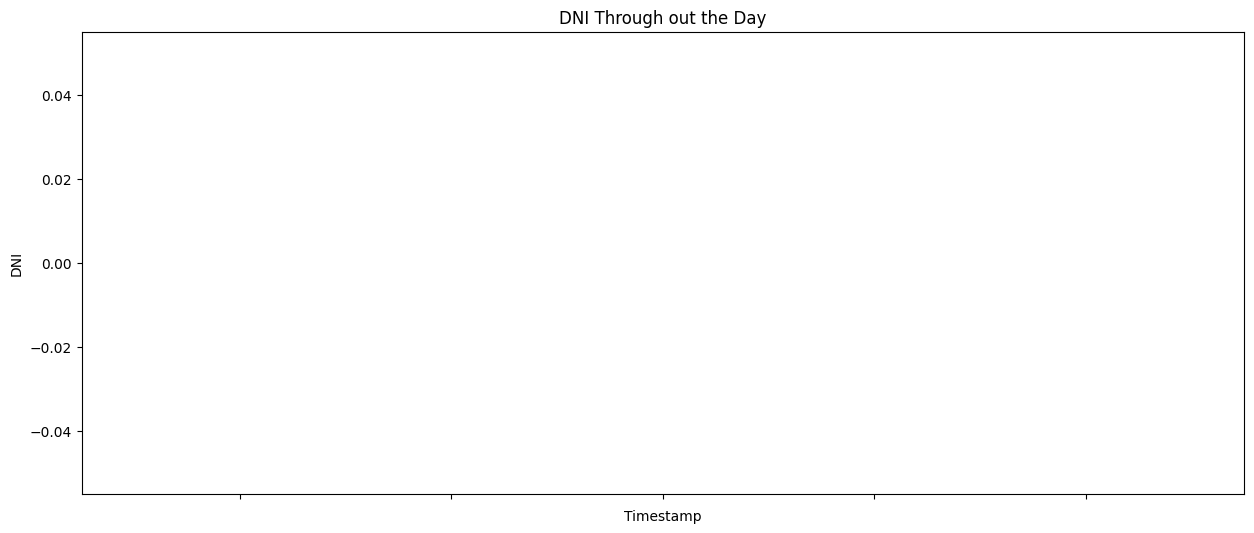

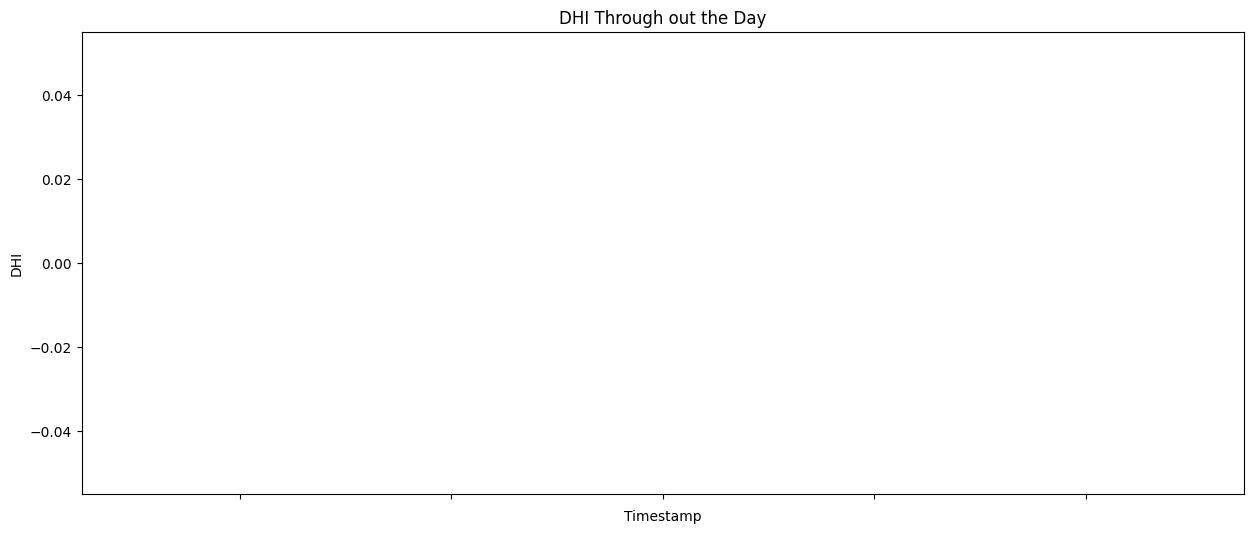

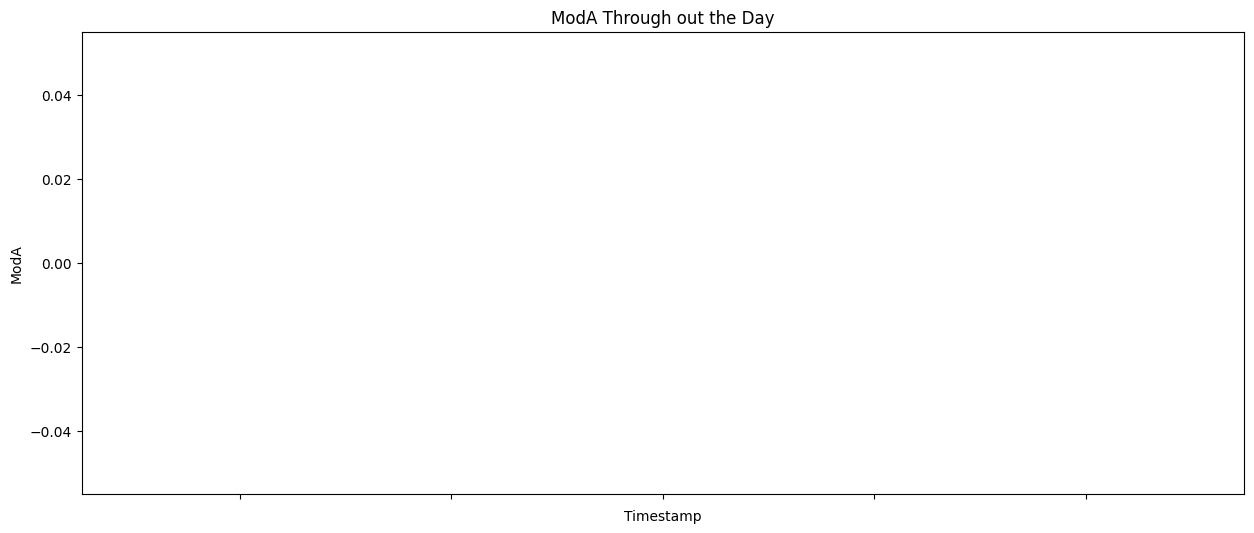

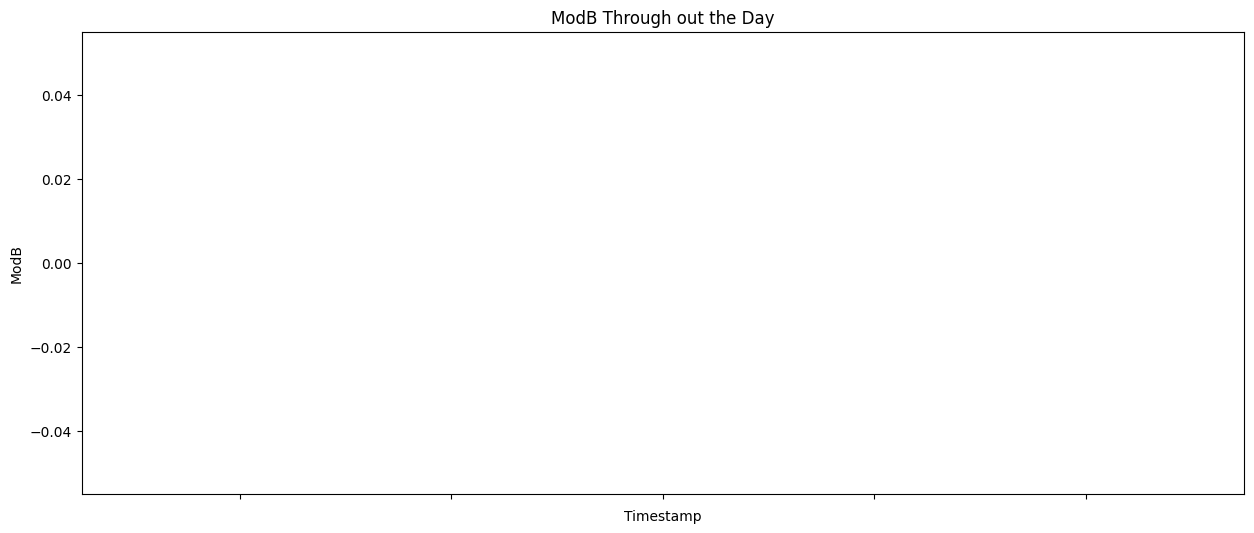

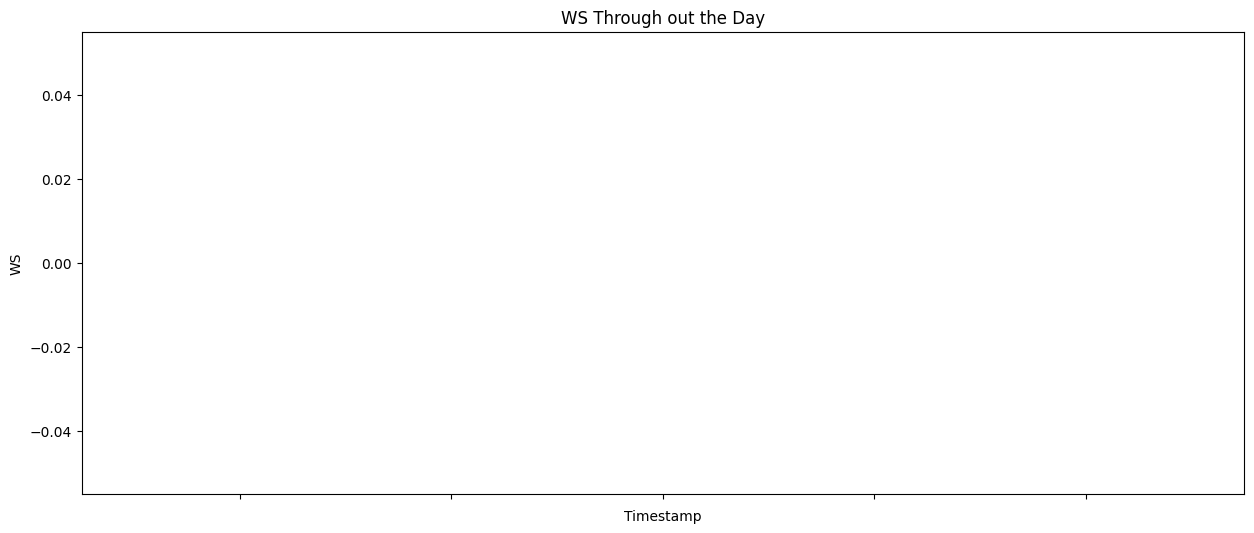

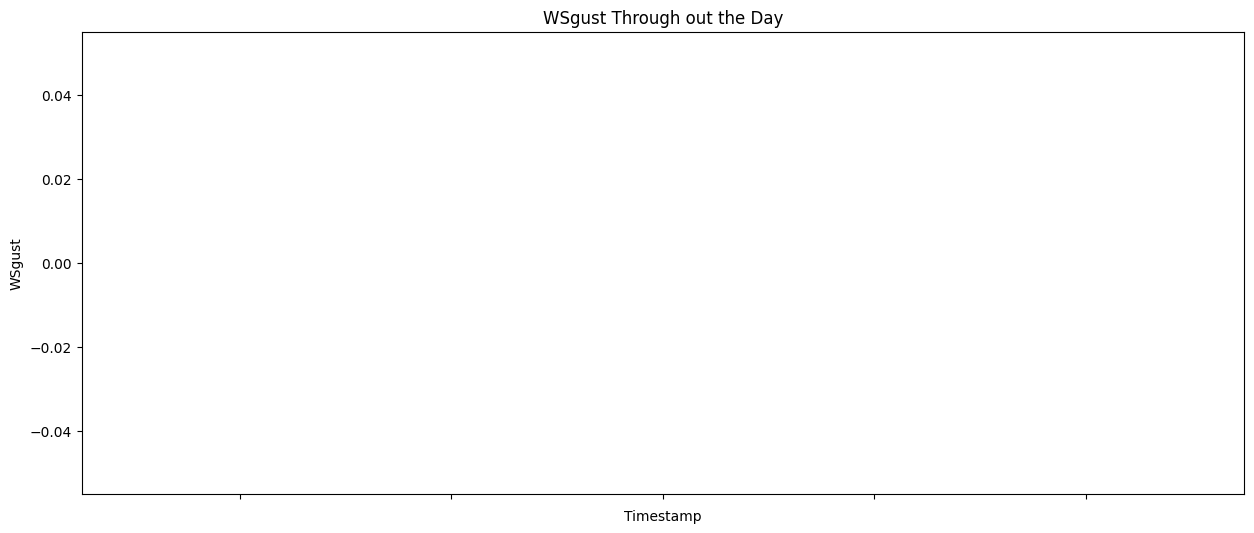

In [24]:
#ploting in a day data trend
for col in columns_to_plot:
    df_clean[col].loc['2021-08-09':'2021-08-10'].plot(kind="line", xlabel="Timestamp", ylabel=col, title= col + " Through out the Day" , figsize=(15, 6))
    plt.show()

## **Cleaning Impact**

Text(0.5, 1.0, 'Module Output Before vs After Cleaning')

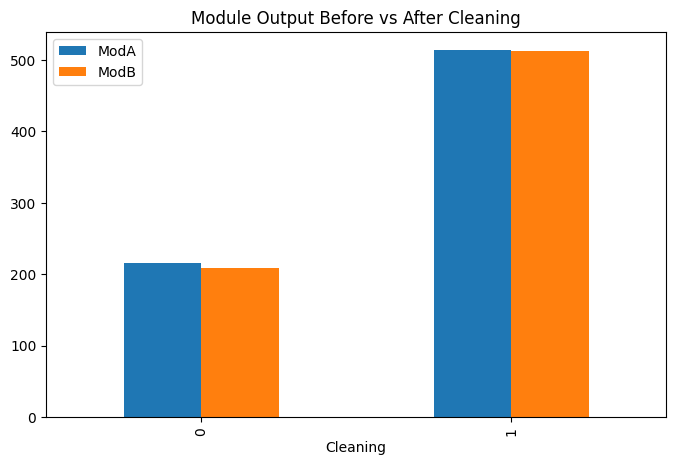

In [25]:
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar', figsize=(8, 5))
plt.title("Module Output Before vs After Cleaning")

 This show how solar panel cleaning affects the sensor readings ... we can see when cleaned we have high measurement

# **Correlation & Relationship Analysis**

<Axes: >

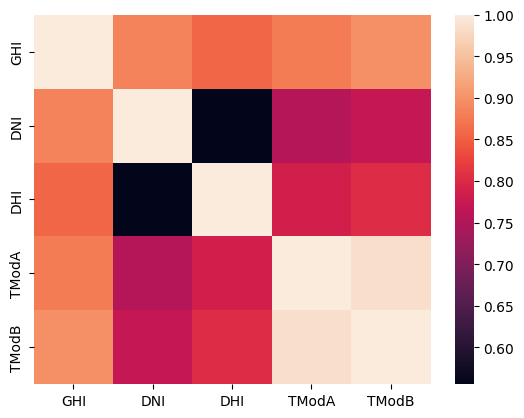

In [26]:
#Heatmap of correlations
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB"]
sns.heatmap(df_clean[corr_cols].corr())

This heatmap show us the correlations between features for example we can see postive relation between Temprature measurement and the solar radiation

<Axes: xlabel='TModA', ylabel='GHI'>

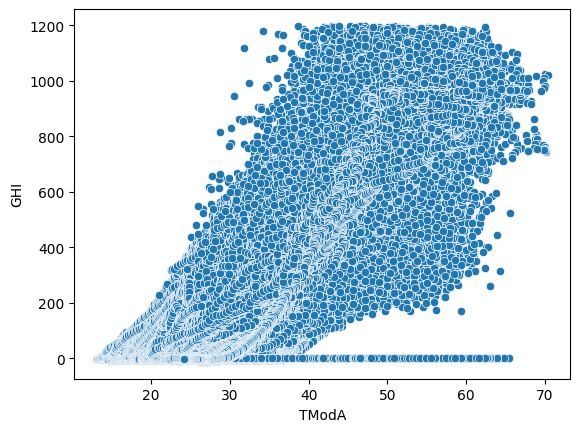

In [27]:
sns.scatterplot(x='TModA', y='GHI', data=df_clean)

<Axes: xlabel='DNI', ylabel='GHI'>

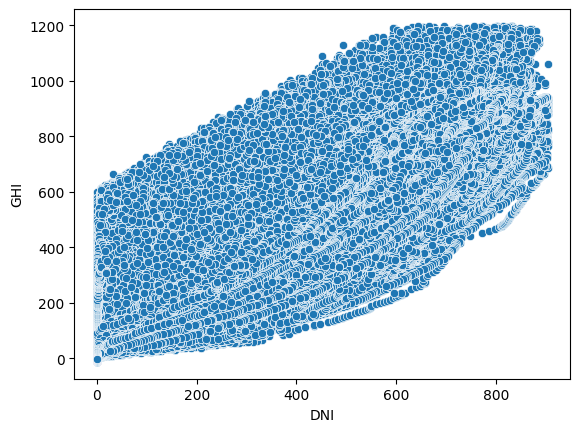

In [28]:
sns.scatterplot(x='DNI', y='GHI', data=df_clean)

<Axes: xlabel='RH', ylabel='Tamb'>

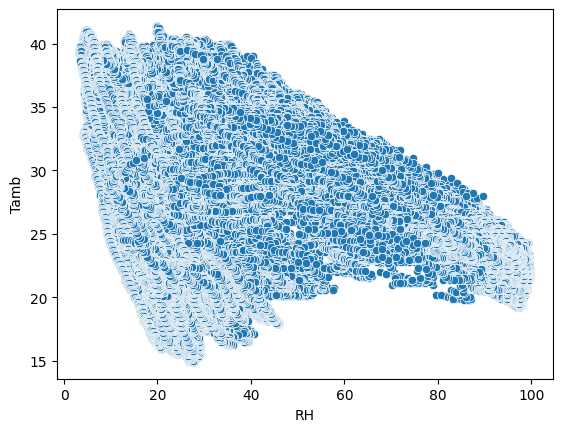

In [29]:
sns.scatterplot(x='RH', y='Tamb', data=df_clean)

This show us the linear relationship between features

## **Wind & Distribution Analysis**

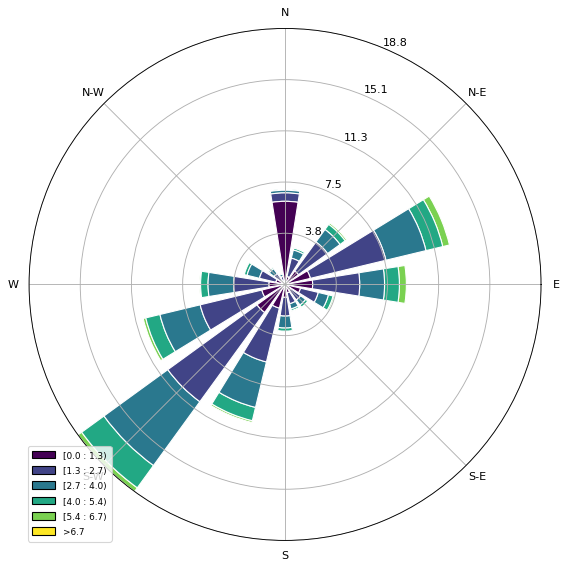

In [30]:
ax = WindroseAxes.from_ax()
ax.bar( df_clean["WD"] , df_clean["WS"] , normed=True , edgecolor="white")
ax.set_legend()

This show us in which direction the wind is high or low

Text(0.5, 1.0, 'Total solar radiation received per square meter on a horizontal surface Distribution')

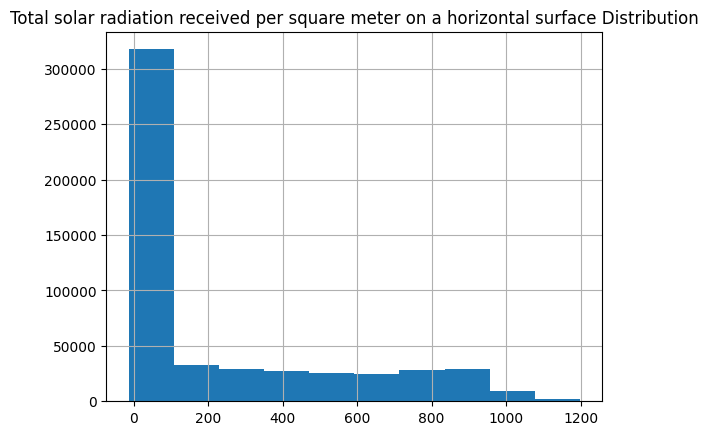

In [31]:
df_clean["GHI"].hist()
plt.title("Total solar radiation received per square meter on a horizontal surface Distribution")

Text(0.5, 1.0, 'Wind Speed Distribution')

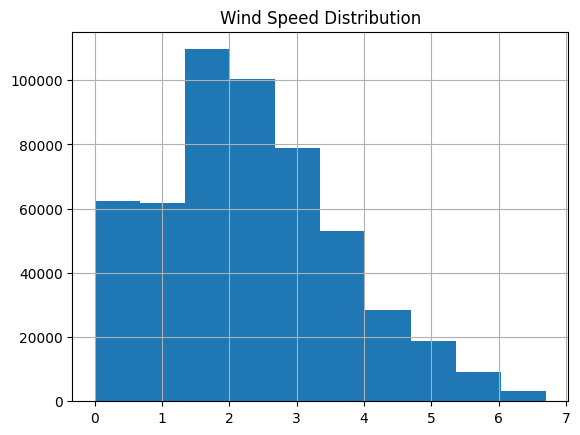

In [33]:
df_clean["WS"].hist()
plt.title("Wind Speed Distribution")

## **Temperature Analysis**

In [34]:
df_clean["RH"].corr(df_clean["TModA"]).round(2)

np.float64(-0.24)

<Axes: xlabel='RH', ylabel='TModA'>

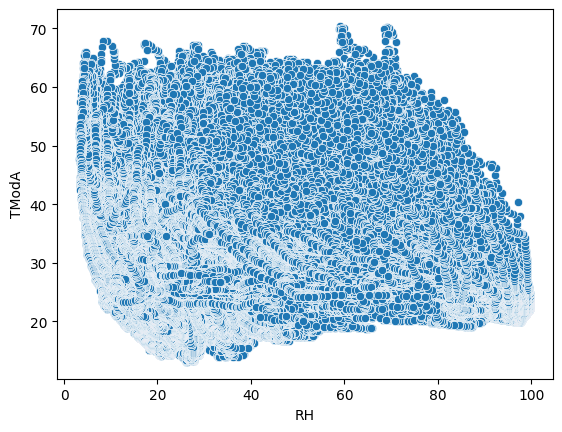

In [35]:
sns.scatterplot(x="RH" , y="TModA"  , data=df_clean)

In [36]:
df_clean["RH"].corr(df_clean["GHI"]).round(2)

np.float64(-0.24)

<Axes: xlabel='RH', ylabel='GHI'>

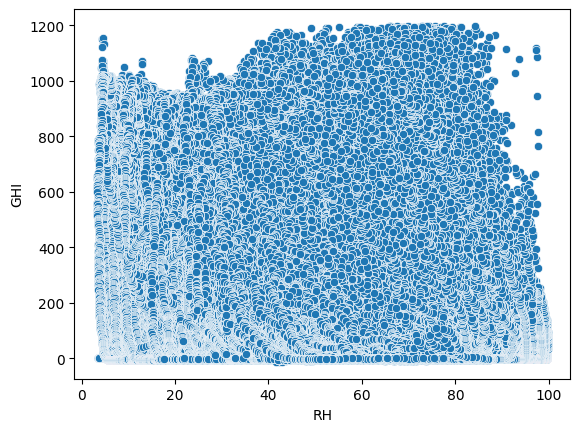

In [37]:
sns.scatterplot(x="RH" , y="GHI"  , data=df_clean)

We have seen the relation between temprature and solar radation over head ,and solar radation over horizon and over head which is for both case -0.35 which week corelation

## Bubble Chart

Text(0, 0.5, 'Ambient Temperature (Tamb)')

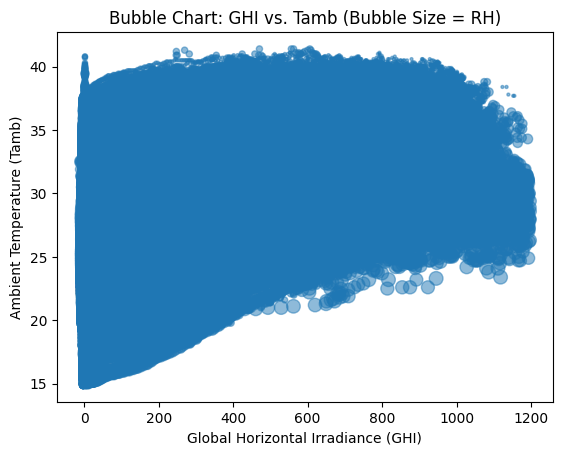

In [39]:
plt.scatter(x="GHI" , y="Tamb" , alpha=0.5 , s="RH", data=df_clean)
plt.title("Bubble Chart: GHI vs. Tamb (Bubble Size = RH)")
plt.xlabel("Global Horizontal Irradiance (GHI)")
plt.ylabel("Ambient Temperature (Tamb)")

This show how GHI and temperature vary together and humidity clusters in specific regions